## PROJET ECONOMETRIE SUR PYTHON

## INTRODUCTION

Le jeu de données faisant l’objet de cette analyse est relatif à des données d’assurance. Il contient 2765 clients d’une 
société d’assurance IARD (assurance non vie), assurance auto

## Importation des packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from scipy.stats import skew, kurtosis

## Importation des donnees et analyse descriptive

### Analyse de la structure du dataframe

In [3]:
# Importation et verification de la structure du jeu de données
data = pd.read_csv("C:/COURS_INSEEDS/PROJET_ECO/actuar.csv", sep=";")
data.head()

,nocontrat,exposition,zone,puissance,agevehicule,ageconducteur,bonus,marque,carburant,densite,region,nbre,no,garantie,cout
0,217,0.74,A,5,4,31,64,3,D,21,8,1,17001,1RC,0.00
1,709,0.18,B,7,8,22,100,2,E,26,0,1,17419,1RC,0.00
2,714,0.48,C,9,0,32,61,12,E,41,13,1,15851,4BG,687.82
3,852,0.27,F,7,5,39,100,12,E,11,0,1,21407,2DO,96.64
4,1083,0.51,E,4,0,49,50,12,E,31,13,1,15589,2DO,70.88


In [29]:
# Inspection de la structure des donnees
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   zone           2765 non-null   object 
 3   puissance      2765 non-null   int64  
 4   agevehicule    2765 non-null   int64  
 5   ageconducteur  2765 non-null   int64  
 6   bonus          2765 non-null   int64  
 7   marque         2765 non-null   int64  
 8   carburant      2765 non-null   object 
 9   densite        2765 non-null   int64  
 10  region         2765 non-null   int64  
 11  nbre           2765 non-null   int64  
 12  no             2765 non-null   int64  
 13  garantie       2765 non-null   object 
 14  cout           2765 non-null   float64
dtypes: float64(2), int64(10), object(3)
memory usage: 324.2+ KB
None


Notre data frame comporte: 
2765 lignes, 15 variables dont 10 numeriques, 2 floats et 3 objets.
Dans le cadre de notre etude il y a des variables numeriques qui sont en realite des variables qualitatives:
les variables marque et region.

In [30]:
# Convertir les variables marque et region en object.
var_conv = ['marque', 'region']
data[var_conv]= data[var_conv].astype('object')

In [31]:
# Verification de la conersion de marque et region en objet
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   zone           2765 non-null   object 
 3   puissance      2765 non-null   int64  
 4   agevehicule    2765 non-null   int64  
 5   ageconducteur  2765 non-null   int64  
 6   bonus          2765 non-null   int64  
 7   marque         2765 non-null   object 
 8   carburant      2765 non-null   object 
 9   densite        2765 non-null   int64  
 10  region         2765 non-null   object 
 11  nbre           2765 non-null   int64  
 12  no             2765 non-null   int64  
 13  garantie       2765 non-null   object 
 14  cout           2765 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 324.2+ KB
None


En observant la sructure de notre data frame nous constatons que pour les 14 variables il n'y a pas de valeurs manquantes.

<Axes: >

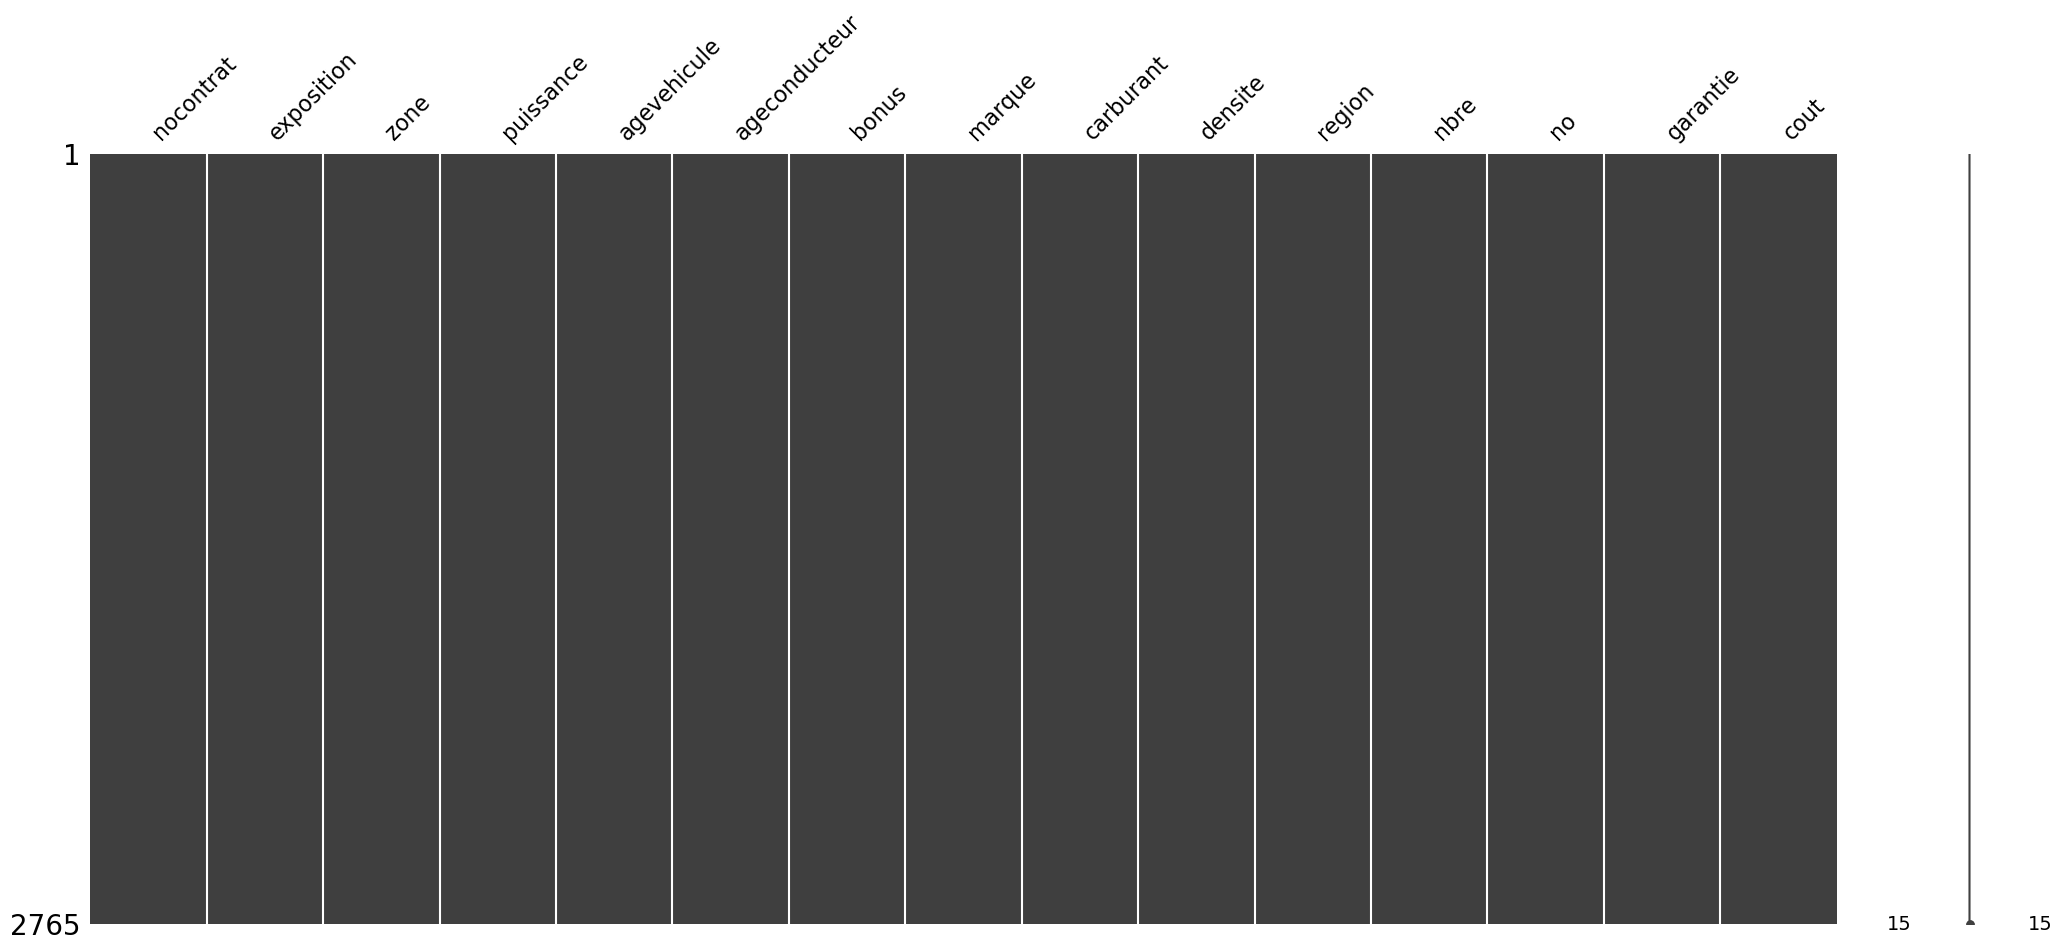

In [32]:
# Verification des variables par le graphique.
msno.matrix(data)

Nous constatons encore une fois que notre dataframe ne comporte aucune donnee manquante.

In [34]:
print(data_var_quali.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   zone       2765 non-null   object
 1   marque     2765 non-null   object
 2   carburant  2765 non-null   object
 3   region     2765 non-null   object
 4   garantie   2765 non-null   object
dtypes: object(5)
memory usage: 108.1+ KB
None


In [35]:
print(data_var_quanti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nocontrat      2765 non-null   int64  
 1   exposition     2765 non-null   float64
 2   puissance      2765 non-null   int64  
 3   agevehicule    2765 non-null   int64  
 4   ageconducteur  2765 non-null   int64  
 5   bonus          2765 non-null   int64  
 6   densite        2765 non-null   int64  
 7   nbre           2765 non-null   int64  
 8   no             2765 non-null   int64  
 9   cout           2765 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 216.1 KB
None


# Analyse descriptive du data frame data_var_quanti.

In [36]:
# Choix des variables quantitatives a utiliser
data_var_quanti = data_var_quanti.drop(['nocontrat', 'no'], axis=1)


In [37]:
# description du data frame
data_var_quanti.describe()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,0.737445,6.373599,6.209403,44.093309,61.213382,49.110307,1.712477,1069.314908
std,0.298041,1.904473,4.722998,13.955868,16.673832,27.837063,0.963596,3690.147963
min,0.008219,4.000000,0.000000,18.000000,50.000000,11.000000,1.000000,-3811.230000
25%,0.500000,5.000000,2.000000,33.000000,50.000000,24.000000,1.000000,132.670000
50%,0.870000,6.000000,5.000000,43.000000,50.000000,52.000000,1.000000,405.570000
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.000000,2.000000,1128.120000
max,1.300000,15.000000,35.000000,99.000000,165.000000,94.000000,7.000000,152449.020000


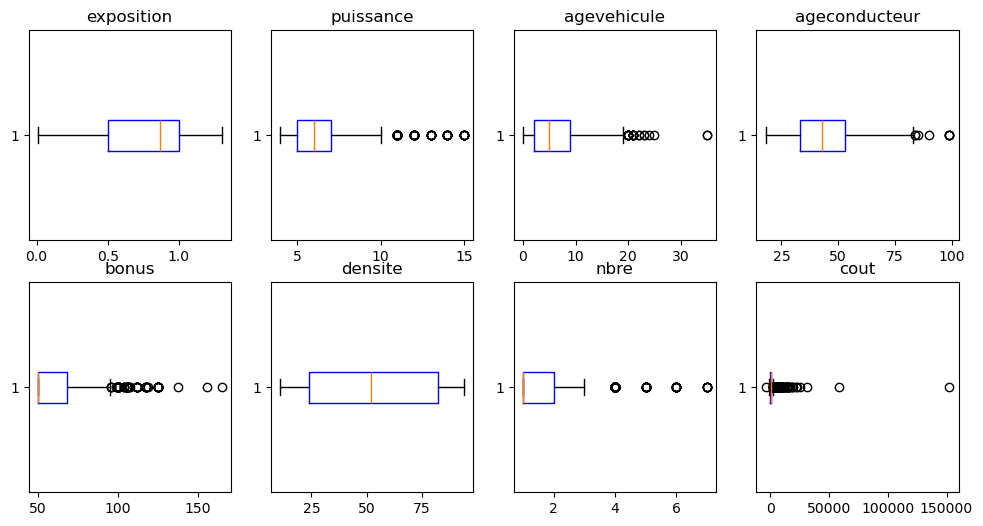

In [38]:
# Verification graphique des variables extremes et valeurs aberrantes
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i, column in enumerate(data_var_quanti.columns):
    axs[i].boxplot(data_var_quanti[column], vert=False, boxprops=dict(color='blue'))
    axs[i].set_title(column)

plt.show()


En visualisant les graphiques nous contatons des valeurs extremes. N'ayant pas une grande connaissance du metiers assurance nous ne prendrons pas de risques en traitant ces valeurs extremes. Par contre pour la variables cout nous des valeurs negatives qui sont effectivement des valeurs abberantes.


In [39]:
# Traitement des valeurs abberantes de la variable cout.
# Determination de la proportion des observations ayants le cout inferieur a 0.
val_neg = data_var_quanti[data_var_quanti['cout']<0] 
prop = val_neg.count()/data_var_quanti.count()
print(prop)

exposition       0.005787
puissance        0.005787
agevehicule      0.005787
ageconducteur    0.005787
bonus            0.005787
densite          0.005787
nbre             0.005787
cout             0.005787
dtype: float64


Le taux est de 0,5% donc nous pouvons supprimer ces observations.

In [40]:
# Suppressions des observations ayants pour cout de siniste inferieur a 0.
data_var_quanti=data_var_quanti[data_var_quanti['cout'] >= 0] 

In [41]:
data_var_quanti.describe()

,exposition,puissance,agevehicule,ageconducteur,bonus,densite,nbre,cout
count,2749.000000,2749.000000,2749.000000,2749.000000,2749.000000,2749.00000,2749.000000,2749.000000
mean,0.737561,6.375409,6.208439,44.096035,61.182612,49.07239,1.712259,1078.619494
std,0.298015,1.904428,4.730648,13.947247,16.653659,27.82443,0.964319,3698.256831
min,0.008219,4.000000,0.000000,18.000000,50.000000,11.00000,1.000000,0.000000
25%,0.500000,5.000000,2.000000,33.000000,50.000000,24.00000,1.000000,137.380000
50%,0.870000,6.000000,5.000000,43.000000,50.000000,52.00000,1.000000,409.930000
75%,1.000000,7.000000,9.000000,53.000000,68.000000,82.00000,2.000000,1128.120000
max,1.300000,15.000000,35.000000,99.000000,165.000000,94.00000,7.000000,152449.020000


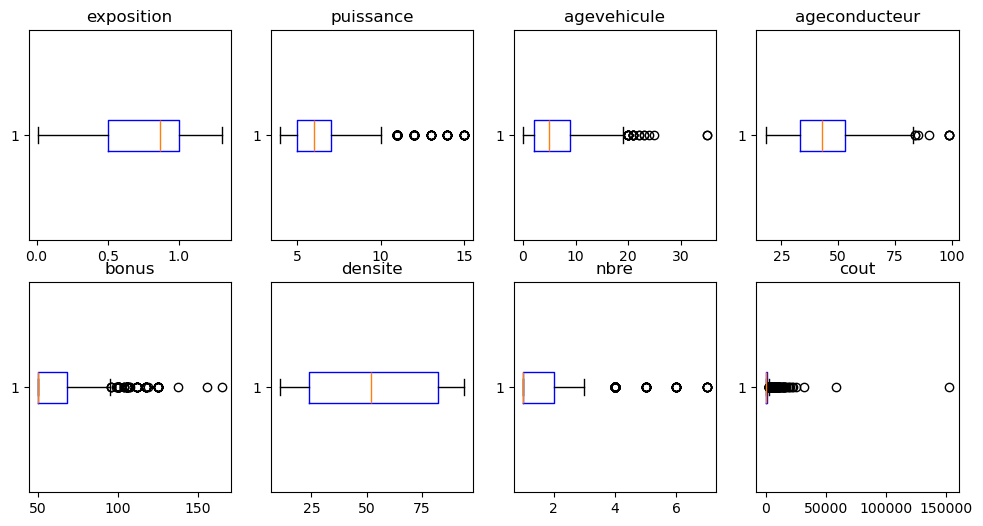

In [42]:
# Verification par les boites a moustache
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs = axs.ravel()

for i, column in enumerate(data_var_quanti.columns):
    axs[i].boxplot(data_var_quanti[column], vert=False, boxprops=dict(color='blue'))
    axs[i].set_title(column)

plt.show()

## 

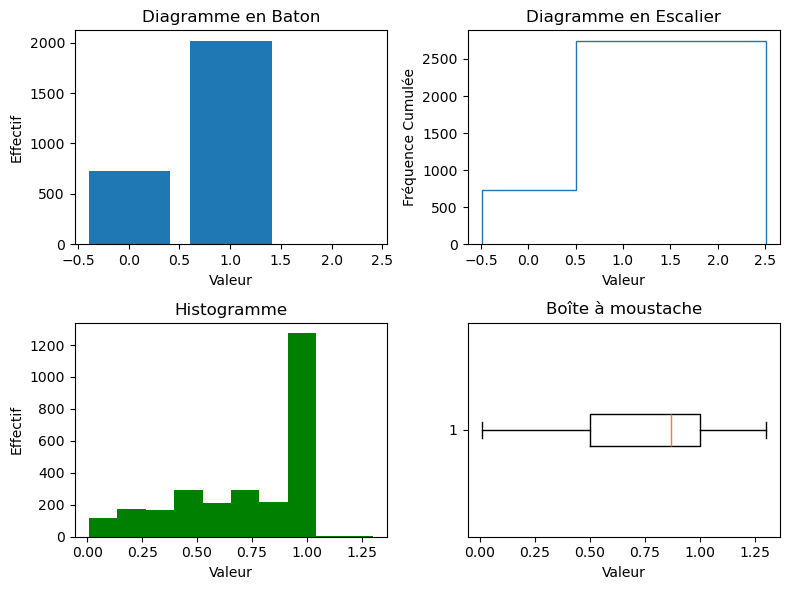

,Effectifs,Eff_Cum_crois,Eff_Cum_décrois,Frequence,Freq_Cum_crois,Freq_Cum_décrois
exposition,,,,,,
0.008219,2,2,2749,0.000728,0.000728,1.000000
0.010000,3,5,2747,0.001091,0.001819,0.999272
0.020000,5,10,2744,0.001819,0.003638,0.998181
0.030000,7,17,2739,0.002546,0.006184,0.996362
0.040000,6,23,2732,0.002183,0.008367,0.993816
...,...,...,...,...,...,...
1.010000,1,2744,6,0.000364,0.998181,0.002183
1.050000,2,2746,5,0.000728,0.998909,0.001819
1.100000,1,2747,3,0.000364,0.999272,0.001091


In [49]:

akposso_qt_graph(data_var_quanti['exposition']) # type: ignore
akposso_qt_tableau(data_var_quanti['exposition']) # type: ignore
akposso_qt_resume(data_var_quanti['exposition']) # type: ignore
akposso_qt_tableau(data_var_quanti['exposition']) # type: ignore